# Breast Cancer Classification

## Introduction

Breast cancer is a common cancer and a leading cause of cancer-associated deaths worldwide. It highlights the importance of early detection to lower mortality rates and improve survival outcomes. In this project, machine learning model which employs an effective discriminant function is used to classify breast tumors based on various features like size, texture, etc. The proposed algorithms such as logistic regression, decision trees, and k-nearest neighbors (KNN) will enhance the diagnostic procedure.

To evaluate these models, we are comparing them based on performance measures such as the ROC-AUC and classification reports so as to be able to identify the most effective approach for tumor classification. The models can therefore be used to enhance diagnostic accuracy since they help improve and ensure more reliable and consistent results even when human error plays a role. This will, in turn, aid in early detection of more reliable results.

## Data preperation

In [52]:
# import the different but necessary libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from collections import Counter

In [18]:
# load the Breast Cancer dataset
# bc = breast cancer

bc_df = load_breast_cancer()
x = bc_df.data
y = bc_df.target

In [19]:
# the type of risk of the breast cancer
# 0 - low risk: benign
# 1 - high risk: malignant

# converting the number 0 and 1 to the type of risk
risk_type = {0: "low risk (Benign Tumour)", 1: "high risk (Malignant Tumour)"}
# get the target value into descriptove risk labels
y_type = pd.Series(y).map(risk_type)

# Creating a dataframe with the featured names (with type of risk col added)
df = pd.DataFrame(x, columns = bc_df.feature_names)
df['Risk Type'] = y_type

In [23]:
# Display dataset overview
print("Overview of the Data set:")
print(df.head())
print("\nClass Distribution:")
print(df['Risk Type'].value_counts())

Overview of the Data set:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wo

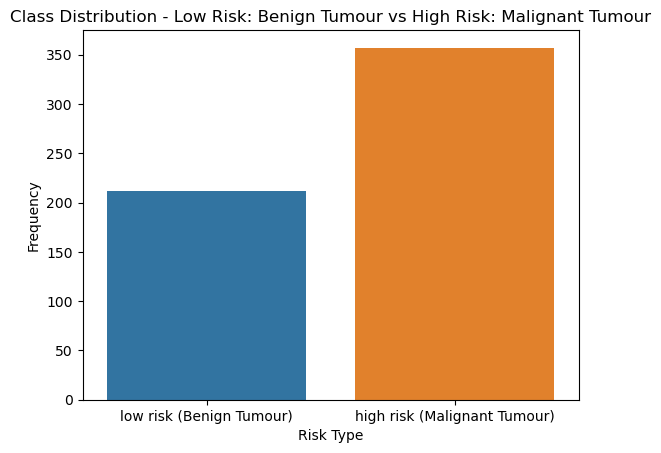

In [24]:
# Visualize class distribution
sns.countplot(data=df, x='Risk Type')
plt.title('Class Distribution - Low Risk: Benign Tumour vs High Risk: Malignant Tumour')
plt.xlabel('Risk Type')
plt.ylabel('Frequency')
plt.show()

## Preprocessing of Data

Preprocessing of data is used to make the dataset prepared for model training and evaluation in an efficient way. This will involving encoding the target as binary labels, split the data into training set as well as testing set, also feature standardization for consistency.

The dataset is then divided into 70% training set and 30% testing set, which is used for development of the model and performance of the unseen data. This is to make sure that the data is clean, well structures and also able to adapt to the machine learning application.

In [6]:
# convert the low risk and high risk label to binary (0 and 1)
y_encode = pd.get_dummies(y_type, drop_first = True).values.ravel()

# splitting into training and test set
# 70% - training the model
# 30% - test the model
x_training, x_testing, y_training, y_testing = train_test_split(x, y_type, test_size=0.3, random_state=50)

# Scaling the features 
scale = StandardScaler()
x_training = scale.fit_transform(x_training)
x_testing = scale.transform(x_testing)

# inspecting the data to ensure there is no hidden errors
print("Encoded Labels (y_encode):", y_encode[:50])  # Show first 10 labels
print("Training Data Shape:", x_training.shape)
print("Testing Data Shape:", x_testing.shape)


Encoded Labels (y_encode): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0]
Training Data Shape: (398, 30)
Testing Data Shape: (171, 30)


## Logistic Regression

Logistic Regression is the supervised machine learning algorithm which is applied and analyzed in this stage. Developed the model to predict whether a breast tumor is benign (low risk) or malignant (high risk) based on input features. After training, the model performance evaluation is done using classification report (precision, recall, F1-score) and ROC-AUC score to measure its capability to discriminate the two classes. Or the curves can be plotted by which a trade-off can be analyzed between true positive and false positive rates and shown how a particular model behaves at different thresholds.

In [25]:

# Encode labels into numeric values
y_encode = pd.get_dummies(y_type, drop_first=True).values.ravel()

# Split the dataset into training and testing sets
x_training, x_testing, y_training, y_testing = train_test_split(
    x, y_encode, test_size=0.3, random_state=50
)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=50)
log_reg.fit(x_training, y_training)

# Make predictions
prediction_log_reg = log_reg.predict(x_testing)

# Evaluate the model
print("Classification Report - Logistic Regression:")
print(classification_report(y_testing, prediction_log_reg))

# Calculate ROC-AUC score using probabilities for the positive class
roc_auc = roc_auc_score(y_testing, log_reg.predict_proba(x_testing)[:, 1])
print("ROC-AUC - Logistic Regression:", roc_auc)



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       112
           1       0.95      0.90      0.92        59

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

ROC-AUC - Logistic Regression: 0.9847154963680388


C:\Users\celli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


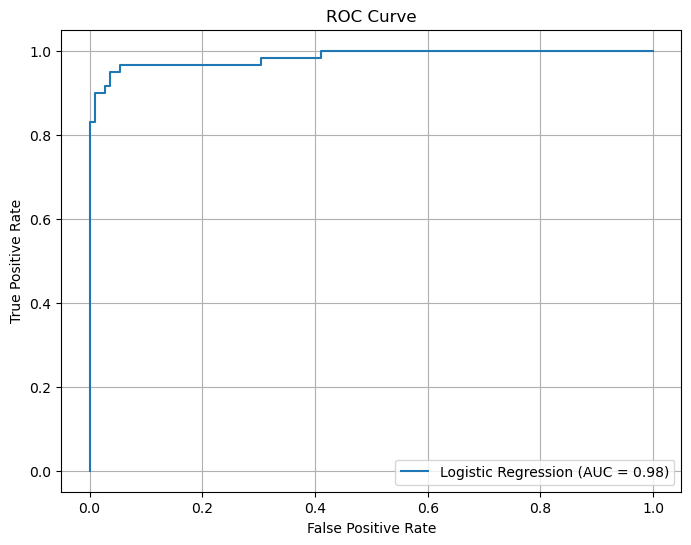

In [8]:
# Plot the ROC Curve
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fp, tp, _ = roc_curve(y_testing, log_reg.predict_proba(x_testing)[:, 1])

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fp, tp, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The ROC curve shows that it has an excellent performance of the model, with the AUC score of 0.98. This shows that the model have a 98% chance of distinguishing the different type of rumours correctly. The steep curve and a high score in AUC also highlight the effectiveness of rhe model in classifiying the breast cancer with minimal trade-off between sensitivity and specificity.

## Decision Trees

Decision tree classifier that classifies breast tumors into the categories of "low risk" and "high risk" with a maximum depth of 5. Then, the model is evaluated on the test data with various metrics such as classification report (precision, recall, and F1-score), ROC-AUC score, etc., to analyze its predictive performance. The tree structure is also visualized to understand its decision-making processes in importance to classification by various features.

In [33]:
dec_tree = DecisionTreeClassifier(random_state=50, max_depth=5)
dec_tree.fit(x_training, y_training)
dec_tree_prediction = dec_tree.predict(x_testing)

# Evaluate Decision Tree
print("Classification Report - Decision Tree:")
print(classification_report(y_testing, dec_tree_prediction))
print("ROC-AUC - Decision Tree:", roc_auc_score(y_testing, dec_tree_prediction))

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85        59
           1       0.94      0.89      0.92       112

    accuracy                           0.89       171
   macro avg       0.88      0.90      0.89       171
weighted avg       0.90      0.89      0.90       171

ROC-AUC - Decision Tree: 0.8955811138014528


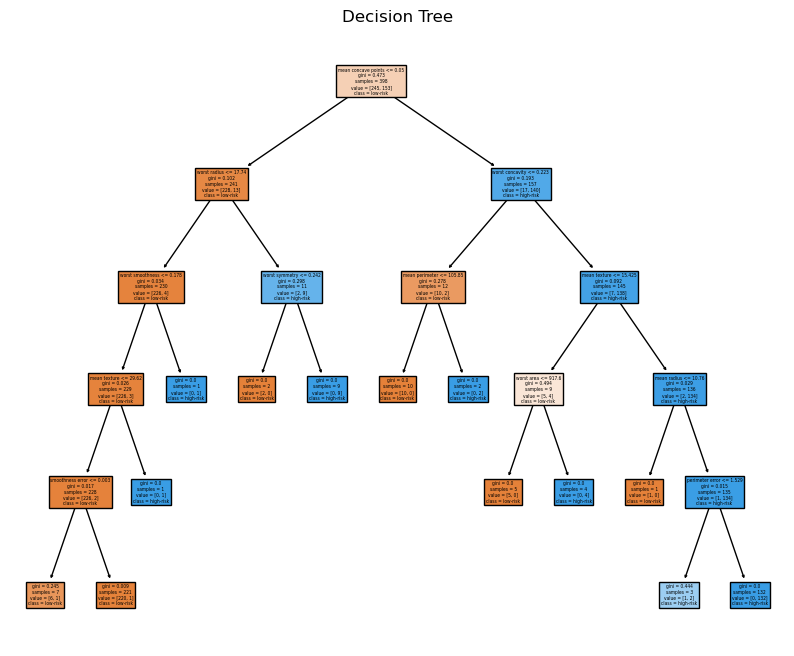

In [29]:
# decision tree plot

plt.figure (figsize = (10, 8))
plot_tree(dec_tree, feature_names=bc_df.feature_names, class_names=['low-risk', 'high-risk'], filled=True)
plt.title('Decision Tree')
plt.show()

The classifier achieves an overall of 89% in accuracy which is pretty satusfactory. However there's a slight class imbalance as the precision and recall for class 1 - malignant are slightly lower than those for class 0 - benign, which might be due to fewer high-risk samples in the dataset (59 vs 112).
Using the decision tree classifier it achieves an AUC of 0.896 and balanced F1-scores across both classes. These results suggest that the model is effective in predicting both low-risk and high-risk breast cancer.

## KNN: k-Nearest Neighbours 

### Implementation from scratch

The custom k-Nearest Neighbors classifier has been completely implemented from scratch and has been used to classify the tumor types of breast masses. In this case, the k equals three; the model calculates the Euclidean distance between the test sample and all training samples to identify the k nearest neighbors. The predicted label for a given test sample is the consensus label among its k nearest neighbors. Both the training and test data were standardized using the StandardScaler. The model was trained on a 70:30 split of the dataset, and the classifier's performance is analyzed through a classification report and the ROC - AUC score; therefore, it gives insight concerning the accuracy and ability to distinguish between "low-risk" and "high-risk" tumor classifications.

In [27]:
# defining the knn from scratch
#initializing the knn classifier
class kNN: 
    def __init__(self, k=3):
        self.k = k
        
    # fitting the knn model into the training data
    # where x_training is the matrix for training and y_training is the training data labels.
    def fitting_knn (self, x_training, y_training):
        self.x_training = x_training
        self.y_training = y_training
    
    # prediciting the label for the data testing
    def prediction(self, x_testing):
        return[self._prediction(x) for x in x_testing]

    # predicting the label - 1 single test
    def _prediction(self, x):

        # using euclidean distance to calculate the distance between the test and all of the training
        # ed = euclidean distance
        ed = [np.linalg.norm(x - x_training) for x_training in self.x_training]

        # get the indices/floating num of the knn
        nearest_num = np.argsort(ed)[:self.k]

        # getting the nearest label
        # lab = label
        closest_lab = [self.y_training[i] for i in nearest_num]

        # getting the label which appear most frequent
        majority = Counter(closest_lab).most_common(1)
        return majority [0][0]

scaler = StandardScaler()

# training the test (random state = 50) for consistency
x_training, x_testing, y_training, y_testing = train_test_split(
        x, y, test_size = 0.3, random_state = 50
    )
    
# scaling training & testing data
x_training = scaler.fit_transform(x_training)
x_testing = scaler.transform(x_testing)

# Initialize
knn = kNN(k=3)

# Train the kNN classifier with the training data
knn.fitting_knn(x_training, y_training)

# Predict the labels for testing data
knn_prediction = knn.prediction(x_testing)

# Print the classification report
print("Classification Report - KNN:")
print(classification_report(y_testing, knn_prediction))

# Calculate and print the ROC-AUC score
print("ROC-AUC - KNN:", roc_auc_score(y_testing, knn_prediction))

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.96      0.96      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

ROC-AUC - KNN: 0.939769975786925


## Comparison from the results

This analysis aims at a performance comparison of three machine learning models: Logistic Regression, Decision Tree and k-Nearest Neighbors (kNN) in classifying breast tumours into "low-risk"" and "high-risk". Performance measurement is based on the ROC-AUC score which measures the model's ability towards distinguishing between classes and confusion matrices indicating how the testing data classified into true positives, false positives, true negatives and false negatives. A bar plot is then made for quick comparison across model effectiveness in terms of ROC-AUC score.

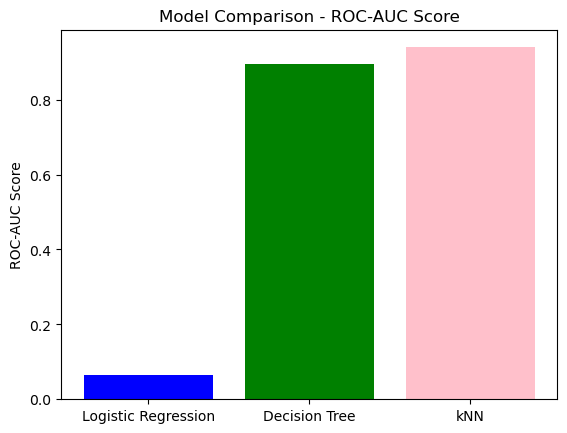

Confusion Matrix for Logistic Regression:
[[  6  53]
 [109   3]]
Confusion Matrix for Decision Tree:
[[ 53   6]
 [ 12 100]]
Confusion Matrix for kNN:
[[ 54   5]
 [  4 108]]


In [62]:
# Compare Metrics
models = ['Logistic Regression', 'Decision Tree', 'kNN']
accuracies = [
    roc_auc_score(y_testing, prediction_log_reg),
    roc_auc_score(y_testing, dec_tree_prediction),
    roc_auc_score(y_testing, knn_prediction)
]

# Bar Plot for Comparison
plt.bar(models, accuracies, color=['blue', 'green', 'pink'])
plt.title('Model Comparison - ROC-AUC Score')
plt.ylabel('ROC-AUC Score')
plt.show()

# Confusion Matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_testing, prediction_log_reg))

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_testing, dec_tree_prediction))

print("Confusion Matrix for kNN:")
print(confusion_matrix(y_testing, knn_prediction))


In [63]:
print("ROC-AUC Score (Logistic Regression):", roc_auc)
print("ROC-AUC - Decision Tree:", roc_auc_score(y_testing, dec_tree_prediction))
print("ROC-AUC Score (kNN):", roc_auc_score(y_testing, knn_prediction))

ROC-AUC Score (Logistic Regression): 0.9847154963680388
ROC-AUC - Decision Tree: 0.8955811138014528
ROC-AUC Score (kNN): 0.939769975786925


## Conclusion

Out of all the models that were tested, the Logistic Regression model achieved the highest ROC-AUC score, showing a pretty good performance across the two classes.But its confusion matrix has poor handling of false negatives, which makes this model not very reliable for high-risk classes.The kNN model is the most balanced among the others: high precision, high recall, and fewer classification errors, which makes it the most effective for this dataset.

# Plots 

More insights on the features and how it detect whether the breast cancer is malignant or benign tumour


## Which features are the most important when classifying the tumours

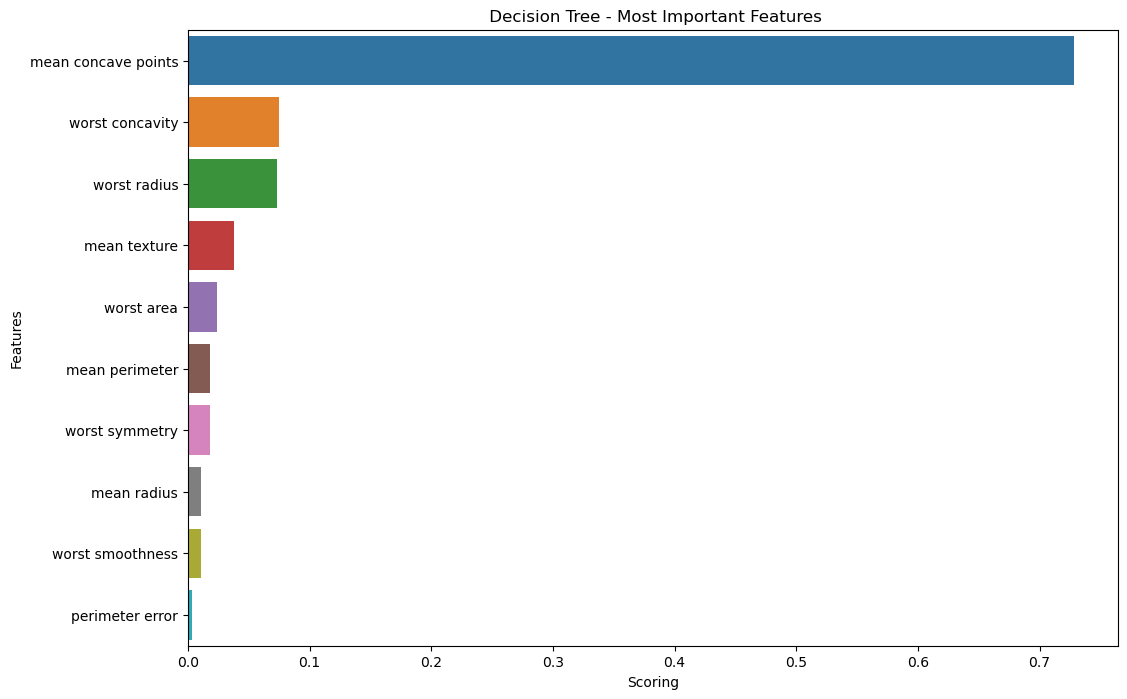

In [43]:
# getting the most important feature scoring from decision tree
most_important = dec_tree.feature_importances_

# Dataframe to organize and visualizing the important features
most_important_feature = pd.DataFrame({
    'Features': bc_df.feature_names,
    "Most_Important": most_important
}).sort_values(by="Most_Important", ascending=False) # sorted based on how important they are

# Visualising the top 10 features 
# x - the scoring, y - features
plt.figure(figsize=(12, 8))
sns.barplot(x = "Most_Important", y = "Features", data = most_important_feature[:10])
plt.title(" Decision Tree - Most Important Features")
plt.xlabel('Scoring') 
plt.ylabel('Features')
plt.show()

## How the key features differentiate between benign and malignant tumour

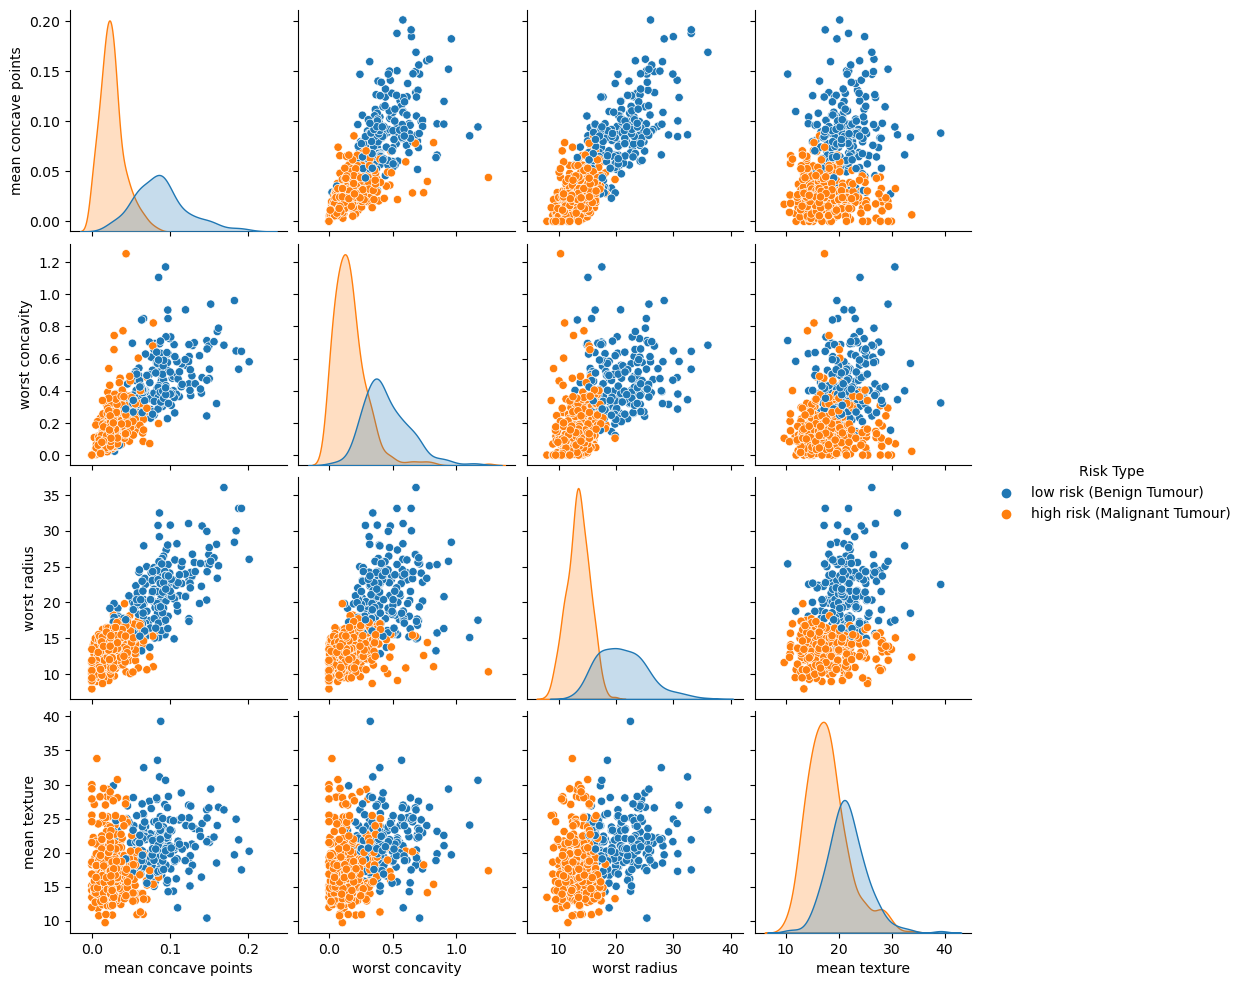

In [47]:
# Select key features for pairplot
key_points = feature_importance_df['Feature'][:4].values
sns.pairplot(df, vars=key_points, hue='Risk Type')
plt.show()


The key features ("mean concave points," "worst concavity," "worst radius," and "mean texture") differentiate between benign and malignant tumors by capturing the geometric irregularities, size, and textural variations that are more pronounced in malignant tumors. These distinctions form the foundation of the Decision Tree's ability to classify the tumors effectively.

edit

## How mean radius and mean texture are distributed between benign and malignant tumours

Mean radius helps us to indentify tumours that are likely malignant based on the size.

Mean texture helps us to get any irregularities of the tumour surface, helping to detect any malignancy.

Both features significantly enhance breast cancer classification by providing geometric and textural information that differentiates benign from malignant tumors.

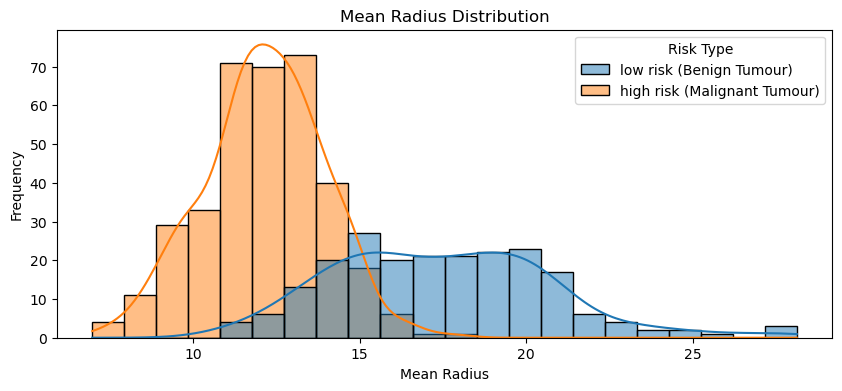

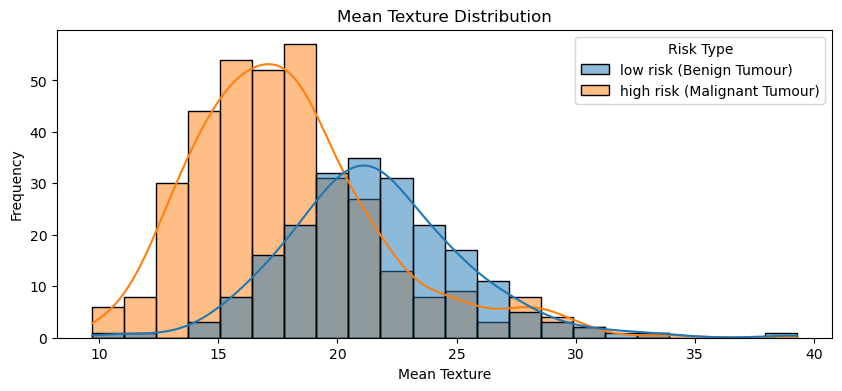

In [68]:
# Distribution plot for mean radius
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='mean radius', hue='Risk Type', kde=True)
plt.title('Mean Radius Distribution')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

# Distribution plot for mean texture
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='mean texture', hue='Risk Type', kde=True)
plt.title('Mean Texture Distribution')
plt.xlabel('Mean Texture')
plt.ylabel('Frequency')
plt.show()


## Heatmap - Confusion Matrix

Help to visualize the confusion matrix.


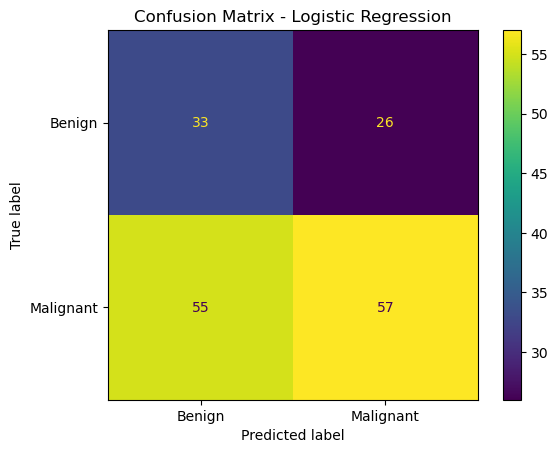

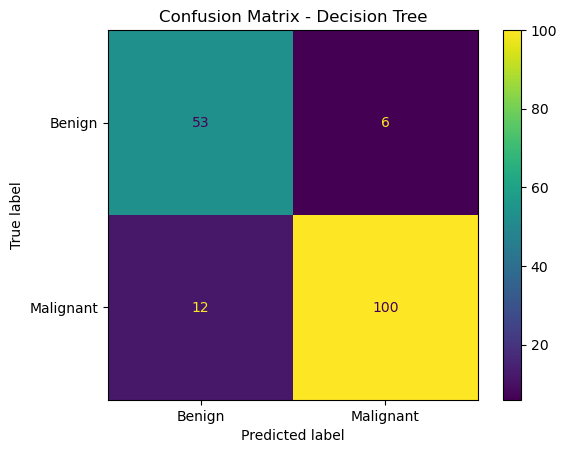

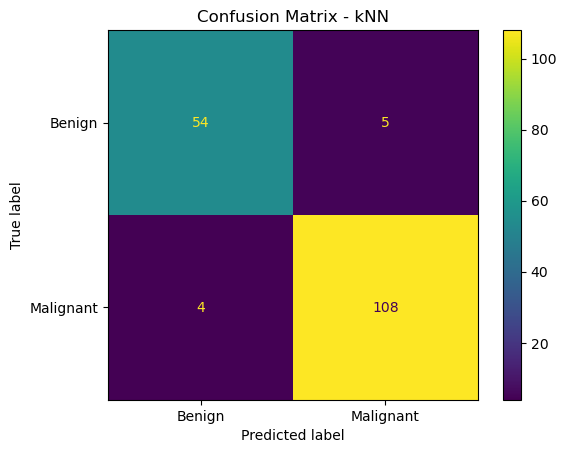

In [65]:
# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_reg, x_testing, y_testing, display_labels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Decision Tree
ConfusionMatrixDisplay.from_estimator(dec_tree, x_testing, y_testing, display_labels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# kNN
ConfusionMatrixDisplay.from_predictions(
    y_testing, knn_prediction, display_labels=['Benign', 'Malignant']
)
plt.title('Confusion Matrix - kNN')
plt.show()
